<a href="https://colab.research.google.com/github/August33rd/finalprojectDS/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Dec 14 23:24:10 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files

In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"august33rd","key":"7169a45eee15939cbbce63601984fffd"}'}

In [7]:
!mkdir ~/.kaggle


In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets list

ref                                                                 title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                            29MB  2023-11-16 01:38:36           1843        181  1.0              
thedevastator/books-sales-and-ratings                               Books Sales and Ratings                           53KB  2023-12-06 04:54:33           1821         28  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data                    763KB  2023-11-21 17:56:32           8261        146  1.0              
jocelyndumlao/cardiovascular-disease-dataset           

In [11]:
! kaggle competitions download -c 'optiver-trading-at-the-close'


 99% 199M/201M [00:07<00:00, 32.4MB/s]
100% 201M/201M [00:07<00:00, 28.3MB/s]


In [12]:
! mkdir finalProject

In [13]:
! unzip /content/optiver-trading-at-the-close.zip -d optiver-trading-at-the-close


Archive:  /content/optiver-trading-at-the-close.zip
  inflating: optiver-trading-at-the-close/example_test_files/revealed_targets.csv  
  inflating: optiver-trading-at-the-close/example_test_files/sample_submission.csv  
  inflating: optiver-trading-at-the-close/example_test_files/test.csv  
  inflating: optiver-trading-at-the-close/optiver2023/__init__.py  
  inflating: optiver-trading-at-the-close/optiver2023/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: optiver-trading-at-the-close/public_timeseries_testing_util.py  
  inflating: optiver-trading-at-the-close/train.csv  


In [14]:
import gc
gc.collect()

0

In [15]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('optiver-trading-at-the-close/train.csv')

In [17]:
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [18]:
!pip install cutecharts

In [19]:
from os import system, getpid, walk
from psutil import Process
#https://www.kaggle.com/code/ravi20076/optiver-baseline-models
def memory_usage():
    pid = getpid()
    py = Process(pid)
    memory_use = py.memory_info()[0] /2. **30
    return f"RAM mem GB usage = {memory_use :.4}"

gc.collect()
memory_usage()

'RAM mem GB usage = 1.528'

In [20]:
#reduce memory
#https://www.kaggle.com/code/pavansanagapati/14-simple-tips-to-save-ram-memory-for-1-gb-dataset

def reduce_mem_usage(df, verbose=0):
    """
    Iterate through all numeric columns of a dataframe and modify the data type
    to reduce memory usage.
    """

    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float32)

    if verbose:
        logger.info(f"Memory usage of dataframe is {start_mem:.2f} MB")
        end_mem = df.memory_usage().sum() / 1024**2
        logger.info(f"Memory usage after optimization is: {end_mem:.2f} MB")
        decrease = 100 * (start_mem - end_mem) / start_mem
        logger.info(f"Decreased by {decrease:.2f}%")

    return df

In [21]:
gc.collect()
memory_usage()

'RAM mem GB usage = 1.528'

In [ ]:
df['target'].shape[0]

5237980

In [22]:
def inspect_columns(df):
    # A helper function that does a better job than df.info() and df.describe()
    result = pd.DataFrame({
        'unique': df.nunique() == len(df),
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / len(df)) * 100, 2),
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=len(df))],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes
    })
    return result

In [130]:
inspect_columns(df2)

,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
date_id,False,481,False,0.00,0.000000e+00,3.150000e+02,4.800000e+02,int64
seconds_in_bucket,False,55,False,0.00,0.000000e+00,2.000000e+02,5.400000e+02,int64
imbalance_size,False,2971863,True,0.00,3.180603e+06,2.064721e+07,1.884286e+06,float64
imbalance_buy_sell_flag,False,3,False,0.00,1.000000e+00,1.000000e+00,-1.000000e+00,int64
reference_price,False,28741,True,0.00,9.998120e-01,9.995030e-01,1.002129e+00,float64
matched_size,False,2948862,True,0.00,1.338028e+07,5.471684e+07,2.407368e+07,float64
far_price,False,95739,True,55.26,NaN,NaN,1.000859e+00,float64
near_price,False,84625,True,54.55,NaN,NaN,1.001494e+00,float64
bid_price,False,28313,True,0.00,9.998120e-01,9.993920e-01,1.002129e+00,float64
bid_size,False,2591772,False,0.00,6.065150e+04,1.845078e+04,2.500814e+05,float64


In [24]:
df2 = df.dropna(subset=["target"])
df2.reset_index(drop=True, inplace=True)

In [25]:
df2['target'].shape[0]
amount_deleted = df['target'].shape[0]- df2['target'].shape[0]
print(amount_deleted)

88


In [ ]:
#inspect_columns(df2)

In [ ]:
gc.collect()
memory_usage()

'RAM mem GB usage = 2.028'

Below is the MA for the WAP, Bid Price, Ask Price, Bid Size, and Ask Size. The Correlations are also below

In [ ]:
"""#WAP 200 Sec MA
df2.loc[:, 'wap_MA_200'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())
#bid_price 200 sec MA
df2.loc[:, 'bid_price_MA_200'] = df2.groupby('stock_id')['bid_price'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())
#bid_size 200 sec MA
df2.loc[:, 'bid_size_MA_200'] = df2.groupby('stock_id')['bid_size'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())
#Ask_price 200 sec MA
df2.loc[:, 'ask_price_MA_200'] = df2.groupby('stock_id')['ask_price'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())
#Ask_size 200 sec MA
df2.loc[:, 'ask_size_MA_200'] = df2.groupby('stock_id')['ask_size'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())
"""

"#WAP 200 Sec MA\ndf2.loc[:, 'wap_MA_200'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())\n#bid_price 200 sec MA\ndf2.loc[:, 'bid_price_MA_200'] = df2.groupby('stock_id')['bid_price'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())\n#bid_size 200 sec MA\ndf2.loc[:, 'bid_size_MA_200'] = df2.groupby('stock_id')['bid_size'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())\n#Ask_price 200 sec MA\ndf2.loc[:, 'ask_price_MA_200'] = df2.groupby('stock_id')['ask_price'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())\n#Ask_size 200 sec MA\ndf2.loc[:, 'ask_size_MA_200'] = df2.groupby('stock_id')['ask_size'].transform(lambda x: x.rolling(span=200, min_periods=1).mean())\n"

In [26]:
#WAP 200 Sec MA
df2.loc[:, 'wap_MA_200'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(window=200).mean())
#bid_price 200 sec MA
df2.loc[:, 'bid_price_MA_200'] = df2.groupby('stock_id')['bid_price'].transform(lambda x: x.rolling(window=200).mean())
#bid_size 200 sec MA
df2.loc[:, 'bid_size_MA_200'] = df2.groupby('stock_id')['bid_size'].transform(lambda x: x.rolling(window=200).mean())
#Ask_price 200 sec MA
df2.loc[:, 'ask_price_MA_200'] = df2.groupby('stock_id')['ask_price'].transform(lambda x: x.rolling(window=200).mean())
#Ask_size 200 sec MA
df2.loc[:, 'ask_size_MA_200'] = df2.groupby('stock_id')['ask_size'].transform(lambda x: x.rolling(window=200).mean())

<ipython-input-26-418dda67bbc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'wap_MA_200'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(window=200).mean())
<ipython-input-26-418dda67bbc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'bid_price_MA_200'] = df2.groupby('stock_id')['bid_price'].transform(lambda x: x.rolling(window=200).mean())
<ipython-input-26-418dda67bbc4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [29]:
# Calculate correlation between target and each new column
correlation_wap = df2['wap_MA_200'].corr(df2['target'])
correlation_bidprice = df2['bid_price_MA_200'].corr(df2['target'])
correlation_bidsize = df2['bid_size_MA_200'].corr(df2['target'])
correlation_askprice = df2['ask_price_MA_200'].corr(df2['target'])
correlation_asksize = df2['ask_size_MA_200'].corr(df2['target'])

print(f"Correlation with Target - WAP 200 Sec MA: {correlation_wap}")
print(f"Correlation with Target - Bid Price 200 Sec MA: {correlation_bidprice}")
print(f"Correlation with Target - Bid Size 200 Sec MA: {correlation_bidsize}")
print(f"Correlation with Target - Ask Price 200 Sec MA: {correlation_askprice}")
print(f"Correlation with Target - Ask Size 200 Sec MA: {correlation_asksize}")

Correlation with Target - WAP 200 Sec MA: -0.0014554045227948471
Correlation with Target - Bid Price 200 Sec MA: -0.0018765231830789762
Correlation with Target - Bid Size 200 Sec MA: -0.0017579432533230725
Correlation with Target - Ask Price 200 Sec MA: -0.00043261331076889254
Correlation with Target - Ask Size 200 Sec MA: -0.000490312651797951


Below is the EMA for the WAP, Bid Price, Ask Price, Bid Size, and Ask Size. The Correlations are also below

In [30]:
# WAP 200 Sec EMA
df2.loc[:, 'wap_EMA_200'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.ewm(span=200, min_periods=1).mean())
# bid_price 200 Sec EMA
df2.loc[:, 'bid_price_EMA_200'] = df2.groupby('stock_id')['bid_price'].transform(lambda x: x.ewm(span=200, min_periods=1).mean())
# bid_size 200 Sec EMA
df2.loc[:, 'bid_size_EMA_200'] = df2.groupby('stock_id')['bid_size'].transform(lambda x: x.ewm(span=200, min_periods=1).mean())
# ask_price 200 Sec EMA
df2.loc[:, 'ask_price_EMA_200'] = df2.groupby('stock_id')['ask_price'].transform(lambda x: x.ewm(span=200, min_periods=1).mean())
# ask_size 200 Sec EMA
df2.loc[:, 'ask_size_EMA_200'] = df2.groupby('stock_id')['ask_size'].transform(lambda x: x.ewm(span=200, min_periods=1).mean())


<ipython-input-30-714a855b3c5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'wap_EMA_200'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.ewm(span=200, min_periods=1).mean())
<ipython-input-30-714a855b3c5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'bid_price_EMA_200'] = df2.groupby('stock_id')['bid_price'].transform(lambda x: x.ewm(span=200, min_periods=1).mean())
<ipython-input-30-714a855b3c5c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [31]:
# Calculate correlation between target and each new column
correlation_wap = df2['wap_EMA_200'].corr(df2['target'])
correlation_bidprice = df2['bid_price_EMA_200'].corr(df2['target'])
correlation_bidsize = df2['bid_size_EMA_200'].corr(df2['target'])
correlation_askprice = df2['ask_price_EMA_200'].corr(df2['target'])
correlation_asksize = df2['ask_size_EMA_200'].corr(df2['target'])

print(f"Correlation with Target - WAP 200 Sec EMA: {correlation_wap}")
print(f"Correlation with Target - Bid Price 200 Sec EMA: {correlation_bidprice}")
print(f"Correlation with Target - Bid Size 200 Sec EMA: {correlation_bidsize}")
print(f"Correlation with Target - Ask Price 200 Sec EMA: {correlation_askprice}")
print(f"Correlation with Target - Ask Size 200 Sec EMA: {correlation_asksize}")

Correlation with Target - WAP 200 Sec EMA: -0.004387989312036502
Correlation with Target - Bid Price 200 Sec EMA: -0.004560730383321838
Correlation with Target - Bid Size 200 Sec EMA: -0.0019560974478572395
Correlation with Target - Ask Price 200 Sec EMA: -0.00291652859083339
Correlation with Target - Ask Size 200 Sec EMA: -0.00016794528303300067


RSI and its correlation with Target

In [32]:
def calculate_rsi(data):
    # Calculate price differences
    delta = data['wap'].diff()

    # Define the window for RSI calculation (e.g., 14 periods)
    window = 14

    # Calculate gains and losses
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    # Calculate the Relative Strength (RS)
    rs = gain / loss

    # Calculate the RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Apply the function to each stock_id
df2.loc[:, 'RSI'] = df2.groupby('stock_id').apply(calculate_rsi).reset_index(level=0, drop=True)


<ipython-input-32-113121203a2e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'RSI'] = df2.groupby('stock_id').apply(calculate_rsi).reset_index(level=0, drop=True)


In [33]:
correlation_RSI = df2['RSI'].corr(df2['target'])
print(f"Correlation with Target - WAP RSI: {correlation_wap}")

Correlation with Target - WAP RSI: -0.004387989312036502


Bollinger Bands and its Correlation

In [34]:
# Assuming a window size of 20 for the moving average and 2 standard deviations for the bands
window_size = 200
std_dev = 2

# Calculate the rolling mean and standard deviation
df2.loc[:, 'MA'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(window=window_size).mean())
df2.loc[:, 'std'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(window=window_size).std())
#df2['MA'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(window=window_size).mean())
#df2['std'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(window=window_size).std())

# Calculate upper and lower Bollinger Bands
df2.loc[:, 'upper_band'] = df2['MA'] + (df2['std'] * std_dev)
df2.loc[:, 'lower_band'] = df2['MA'] - (df2['std'] * std_dev)
#df2['upper_band'] = df2['MA'] + (df2['std'] * std_dev)
#df2['lower_band'] = df2['MA'] - (df2['std'] * std_dev)

correlation_upper_band = df2['upper_band'].corr(df2['target'])
correlation_lower_band = df2['lower_band'].corr(df2['target'])
print(f"Correlation with Target - upper_band: {correlation_upper_band}")
print(f"Correlation with Target - lower_band: {correlation_lower_band}")

<ipython-input-34-04f37774813d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'MA'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(window=window_size).mean())
<ipython-input-34-04f37774813d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'std'] = df2.groupby('stock_id')['wap'].transform(lambda x: x.rolling(window=window_size).std())
<ipython-input-34-04f37774813d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Correlation with Target - upper_band: 0.0075157151272186975
Correlation with Target - lower_band: -0.009505608935796621


ATR and its correlation

In [35]:
# Calculate True Range (TR)
df2.loc[:, 'high_low'] = df2['ask_price'] - df2['bid_price']
df2.loc[:,'high_prev_close'] = abs(df2['ask_price'] - df2['wap'].shift())
df2.loc[:,'low_prev_close'] = abs(df2['bid_price'] - df2['wap'].shift())
df2.loc[:,'TR'] = df2[['high_low', 'high_prev_close', 'low_prev_close']].max(axis=1)

# Calculate ATR (14-day period)
atr_window = 200
df2.loc[:,'ATR'] = df2.groupby('stock_id')['TR'].transform(lambda x: x.rolling(window=atr_window).mean())

correlation_ATR = df2['ATR'].corr(df2['target'])
print(f"Correlation with Target - ATR: {correlation_ATR}")

<ipython-input-35-69e7252d95ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'high_low'] = df2['ask_price'] - df2['bid_price']
<ipython-input-35-69e7252d95ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'high_prev_close'] = abs(df2['ask_price'] - df2['wap'].shift())
<ipython-input-35-69e7252d95ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Correlation with Target - ATR: 0.00522828025087743


<ipython-input-35-69e7252d95ff>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'ATR'] = df2.groupby('stock_id')['TR'].transform(lambda x: x.rolling(window=atr_window).mean())


Lagged Variables and its correlation

In [36]:
# Assuming you want to include the previous value of 'wap' and 'target' columns
df2.loc[:, 'prev_wap'] = df2.groupby('stock_id')['wap'].shift()
df2.loc[:, 'prev_target'] = df2.groupby('stock_id')['target'].shift()
df2.loc[:, 'prev_matched_size'] = df2.groupby('stock_id')['matched_size'].shift()

correlation_prev_wap = df2['prev_wap'].corr(df2['target'])
correlation_prev_target = df2['prev_target'].corr(df2['target'])
correlation_prev_matched_size = df2['prev_matched_size'].corr(df['target'])
print(f"Correlation with Target - lagged wap: {correlation_prev_wap}")
print(f"Correlation with Target - lagged target: {correlation_prev_target}")
print(f"Correlation with Target - lagged matched size: {correlation_prev_matched_size}")

<ipython-input-36-a11edbdd954e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'prev_wap'] = df2.groupby('stock_id')['wap'].shift()
<ipython-input-36-a11edbdd954e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'prev_target'] = df2.groupby('stock_id')['target'].shift()
<ipython-input-36-a11edbdd954e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Correlation with Target - lagged wap: -0.022193679240722363
Correlation with Target - lagged target: 0.7575336126859924
Correlation with Target - lagged matched size: 0.0007274462039538491


Heatmap

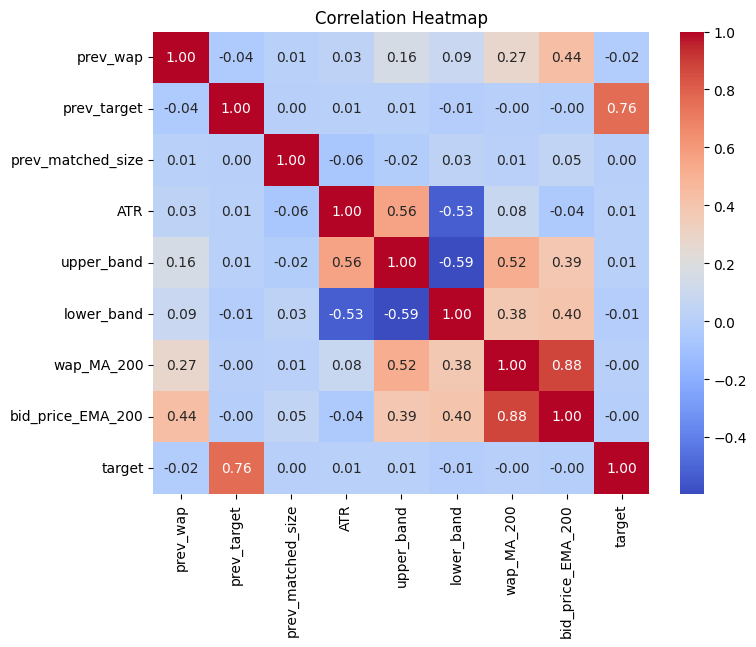

In [38]:
import seaborn as sns7
import matplotlib.pyplot as plt

# Selecting specific columns for correlation analysis
selected_columns = ['prev_wap', 'prev_target', 'prev_matched_size', 'ATR', 'upper_band', 'lower_band', 'wap_MA_200', 'bid_price_EMA_200', 'target']

# Creating a subset of the DataFrame with selected columns
selected_df = df2[selected_columns]

# Calculating correlation matrix
correlation_matrix = selected_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
"""#https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

features = ['seconds_in_bucket', 'imbalance_size','matched_size','bid_size','ask_size',
            'reference_price','far_price','near_price','ask_price','bid_price','wap'
           ]#took out target
#df2[features]



prices = ['reference_price','far_price','near_price','ask_price','bid_price','wap']
#df2[prices]



volume = ['imbalance_size','matched_size','bid_size','ask_size']
#df2[volume]



time = ['seconds_in_bucket']
#df2[time]

eng_features = ['rsi','ma','ema','macd','rsi','vma']
#df2[eng_features]


X = df[['seconds_in_bucket', 'imbalance_size','matched_size','bid_size','ask_size',
            'reference_price','far_price','near_price','ask_price','bid_price','wap'
         ]]#,'rsi','ma','ema','macd','rsi','vma'
y = df['target']

#go back and fix below variable names
preprocessing_steps = [
    ('imputer', SimpleImputer(strategy='mean'), ['feature1', 'feature2', 'volume_diff_300s']),
    ('scaler', StandardScaler(), ['feature1', 'feature2', 'volume_diff_300s']),
]

steps = [
    ('preprocessing', ColumnTransformer(transformers=preprocessing_steps)),
    ('classifier', LogisticRegression()),
]

pipe = Pipeline(steps)


set_config(display='diagram')
pipe.fit(X, y)"""


In [39]:
df2.head

<bound method NDFrame.head of          stock_id  date_id  seconds_in_bucket  imbalance_size  \
0               0        0                  0      3180602.69   
1               1        0                  0       166603.91   
2               2        0                  0       302879.87   
3               3        0                  0     11917682.27   
4               4        0                  0       447549.96   
...           ...      ...                ...             ...   
5237887       195      480                540      2440722.89   
5237888       196      480                540       349510.47   
5237889       197      480                540            0.00   
5237890       198      480                540      1000898.84   
5237891       199      480                540      1884285.71   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                              1         0.999812   13380276.64        NaN   
1                             -1 

In [ ]:
df_new = df.dropna(subset=["target"])
df_new.reset_index(drop=True, inplace=True)

df_new.head

<bound method NDFrame.head of          stock_id  date_id  seconds_in_bucket  imbalance_size  \
0               0        0                  0      3180602.69   
1               1        0                  0       166603.91   
2               2        0                  0       302879.87   
3               3        0                  0     11917682.27   
4               4        0                  0       447549.96   
...           ...      ...                ...             ...   
5237887       195      480                540      2440722.89   
5237888       196      480                540       349510.47   
5237889       197      480                540            0.00   
5237890       198      480                540      1000898.84   
5237891       199      480                540      1884285.71   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                              1         0.999812   13380276.64        NaN   
1                             -1 

In [42]:
#Test MAE before adding new features
df2 = df.dropna(subset=["target"])
df2.reset_index(drop=True, inplace=True)

In [40]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 16.8 MB/s eta 0:00:00


In [47]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cbt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Drop unnecessary columns
#df_new = df_new.drop(columns=['far_price', 'near_price', 'wap', 'row_id'])

# Define features and target
X = df2.drop(columns=['target'])
y = df2['target']

# Initialize models
lgb_model = lgb.LGBMRegressor()
xgb_model = xgb.XGBRegressor()
cbt_model = cbt.CatBoostRegressor()

# The total number of date_ids is 480, we split them into 5 folds with a gap of 5 days in between
num_folds = 5
fold_size = 480 // num_folds
gap = 5

df2['row_id'] = df2['row_id'].astype('int')
df2['date_id'] = df2['date_id'].astype('int')

for i in range(num_folds):
    start = i * fold_size
    end = start + fold_size

    # Print current fold information
    print(f"Fold {i + 1}: Training on dates {start}-{end}")

    # Define the purged set ranges
    purged_before_start = start - 2
    purged_before_end = start + 2
    purged_after_start = end - 2
    purged_after_end = end + 2

    df2['row_id'] = df2['row_id'].astype('int')
    df2['date_id'] = df2['date_id'].astype('int')

    # Exclude the purged ranges from the test set
    purged_set = ((df2['date_id'] >= purged_before_start) & (df2['date_id'] <= purged_before_end)) | \
                 ((df2['date_id'] >= purged_after_start) & (df2['date_id'] <= purged_after_end))

    # Split the data based on the selected dates
    train_indices = ~((df2['date_id'] >= start) & (df2['date_id'] < end) & purged_set)
    test_indices = (df2['date_id'] >= start) & (df2['date_id'] < end) & ~purged_set

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # LightGBM
    lgb_model.fit(X_train, y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_mae = mean_absolute_error(y_test, lgb_predictions)
    print(f'LightGBM MAE: {lgb_mae}')

    # XGBoost
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)
    xgb_mae = mean_absolute_error(y_test, xgb_predictions)
    print(f'XGBoost MAE: {xgb_mae}')

    # CatBoost
    cbt_model.fit(X_train, y_train)
    cbt_predictions = cbt_model.predict(X_test)
    cbt_mae = mean_absolute_error(y_test, cbt_predictions)
    print(f'CatBoost MAE: {cbt_mae}')


<ipython-input-47-336106b39094>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['row_id'] = df2['row_id'].astype('int')
<ipython-input-47-336106b39094>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date_id'] = df2['date_id'].astype('int')
<ipython-input-47-336106b39094>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Fold 1: Training on dates 0-96
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3567
[LightGBM] [Info] Number of data points in the train set: 5184707, number of used features: 16
[LightGBM] [Info] Start training from score -0.044414
LightGBM MAE: 5.5994149621691225
XGBoost MAE: 5.54845486117378
Learning rate set to 0.158163
0:	learn: 9.4289856	total: 304ms	remaining: 5m 4s
1:	learn: 9.4158446	total: 494ms	remaining: 4m 6s
2:	learn: 9.4063874	total: 686ms	remaining: 3m 47s
3:	learn: 9.3985478	total: 879ms	remaining: 3m 38s
4:	learn: 9.3924500	total: 1.07s	remaining: 3m 33s
5:	learn: 9.3877000	total: 1.26s	remaining: 3m 28s
6:	learn: 9.3839339	total: 1.46s	remaining: 3m 27s
7:	learn: 9.3809419	total: 1.65s	remaining: 3m 24s
8:	learn: 9.3777868	total: 1.84s	remaining: 3m 22s
9:	learn: 

<ipython-input-47-336106b39094>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['row_id'] = df2['row_id'].astype('int')
<ipython-input-47-336106b39094>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date_id'] = df2['date_id'].astype('int')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3566
[LightGBM] [Info] Number of data points in the train set: 5183552, number of used features: 16
[LightGBM] [Info] Start training from score -0.048020
LightGBM MAE: 6.994766996507753
XGBoost MAE: 6.9353144297579234
Learning rate set to 0.158158
0:	learn: 9.3664042	total: 294ms	remaining: 4m 53s
1:	learn: 9.3533244	total: 550ms	remaining: 4m 34s
2:	learn: 9.3435663	total: 778ms	remaining: 4m 18s
3:	learn: 9.3363493	total: 1000ms	remaining: 4m 8s
4:	learn: 9.3303550	total: 1.23s	remaining: 4m 4s
5:	learn: 9.3255701	total: 1.48s	remaining: 4m 4s
6:	learn: 9.3213352	total: 1.7s	remaining: 4m
7:	learn: 9.3179727	total: 1.94s	remaining: 4m 1s
8:	learn: 9.3154244	total: 2.18s	remaining: 3m 59s
9:	learn: 9.3132772	total: 2.41s	remaining: 3m

<ipython-input-47-336106b39094>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['row_id'] = df2['row_id'].astype('int')
<ipython-input-47-336106b39094>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date_id'] = df2['date_id'].astype('int')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3568
[LightGBM] [Info] Number of data points in the train set: 5183167, number of used features: 16
[LightGBM] [Info] Start training from score -0.049753
LightGBM MAE: 6.357515418671158
XGBoost MAE: 6.310606014059073
Learning rate set to 0.158156
0:	learn: 9.4091345	total: 219ms	remaining: 3m 39s
1:	learn: 9.3963023	total: 401ms	remaining: 3m 20s
2:	learn: 9.3864126	total: 594ms	remaining: 3m 17s
3:	learn: 9.3787966	total: 794ms	remaining: 3m 17s
4:	learn: 9.3726586	total: 971ms	remaining: 3m 13s
5:	learn: 9.3679098	total: 1.15s	remaining: 3m 10s
6:	learn: 9.3640357	total: 1.33s	remaining: 3m 8s
7:	learn: 9.3597805	total: 1.54s	remaining: 3m 10s
8:	learn: 9.3568396	total: 1.71s	remaining: 3m 8s
9:	learn: 9.3546805	total: 1.91s	remainin

KeyboardInterrupt: ignored

In [ ]:
gc.collect()

In [48]:
np.random.seed(0)
dates = pd.date_range('20230101', periods=100)
prices = np.random.normal(100, 10, size=(100,))
volumes = np.random.normal(500, 50, size=(100,))
volatility = np.random.normal(0.5, 0.05, size=(100,))

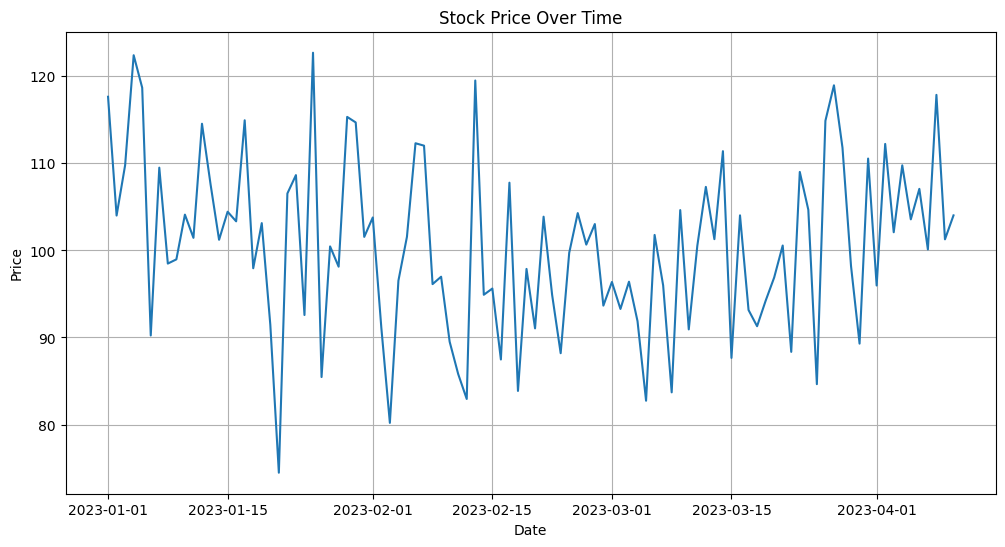

In [49]:
data = pd.DataFrame({'Date': dates, 'Price': prices, 'Volume': volumes, 'Volatility': volatility})

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

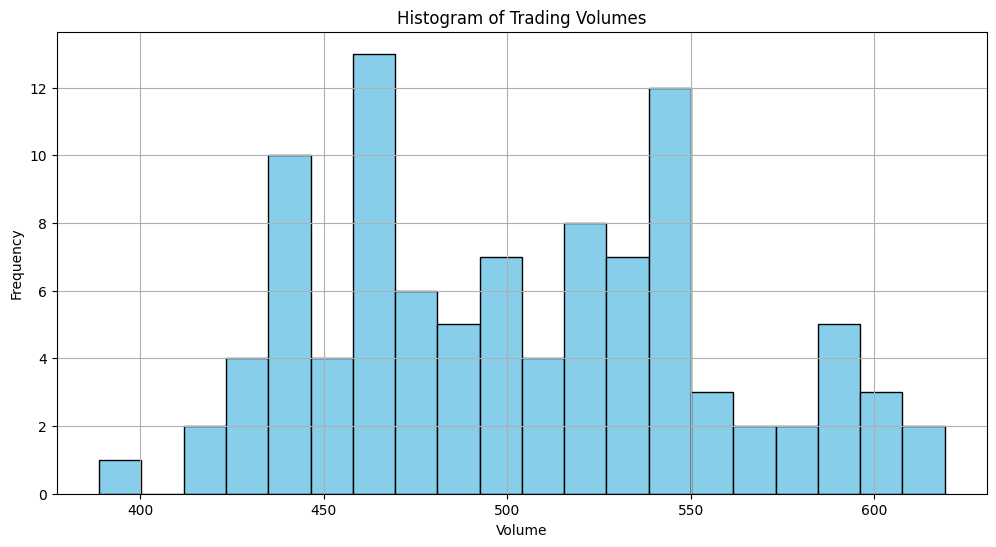

In [50]:
plt.figure(figsize=(12, 6))
plt.hist(data['Volume'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Price'], data['Volatility'], alpha=0.7, color='purple')
plt.title('Scatter Plot of Price vs Volatility')
plt.xlabel('Price')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

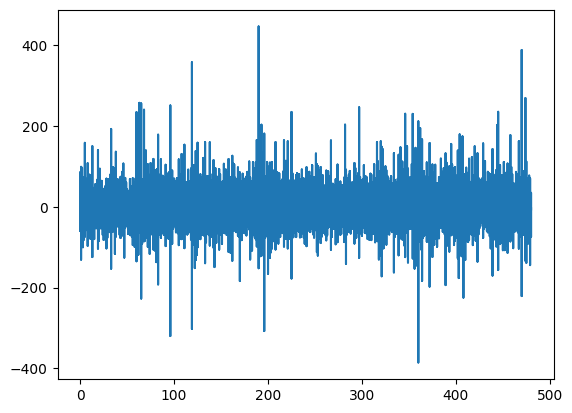

In [52]:
plt.plot(df2['date_id'], df2['target'])

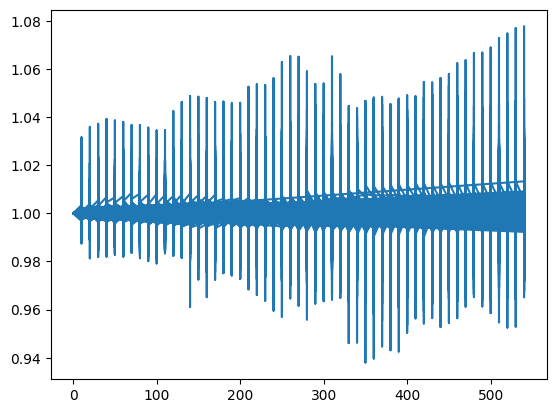

In [53]:
plt.plot(df2['seconds_in_bucket'], df2['wap'])

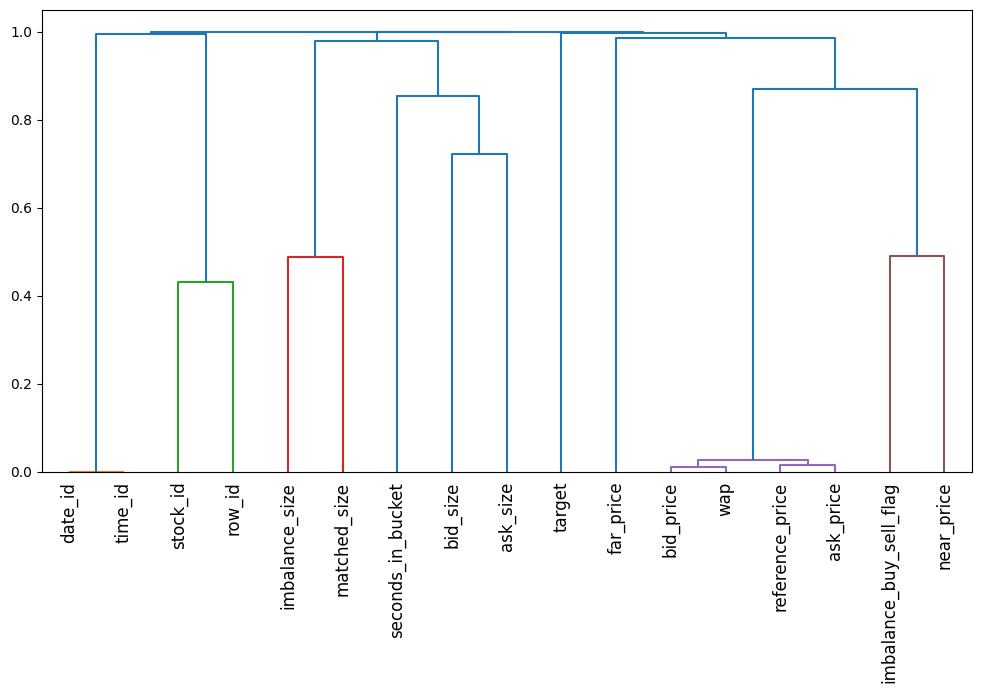

In [58]:
import pandas as pd

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

mat_corr = df2.corr()
plt.figure(figsize=(12,6))
dissimilarity = 1 - abs(mat_corr)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=df2.columns, orientation='top',
           leaf_rotation=90);

In [79]:

df.columns


Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')

<Axes: title={'center': 'Stock 0'}, xlabel='seconds_in_bucket'>

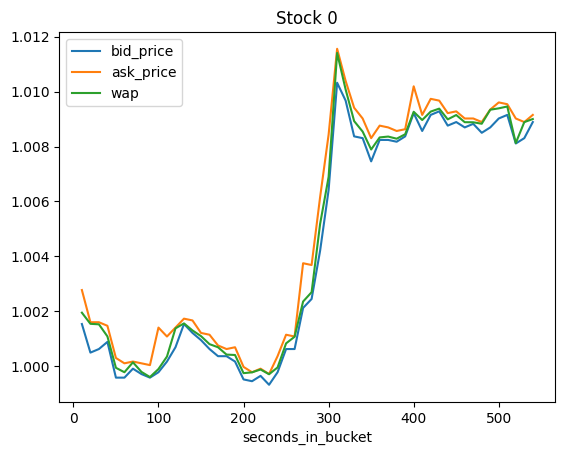

In [84]:
(
    df2
    .query('stock_id ==33 & date_id ==33')
    [['seconds_in_bucket','bid_price','ask_price', 'wap']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title='Stock 0')
)



<Axes: title={'center': 'price'}, xlabel='seconds_in_bucket'>

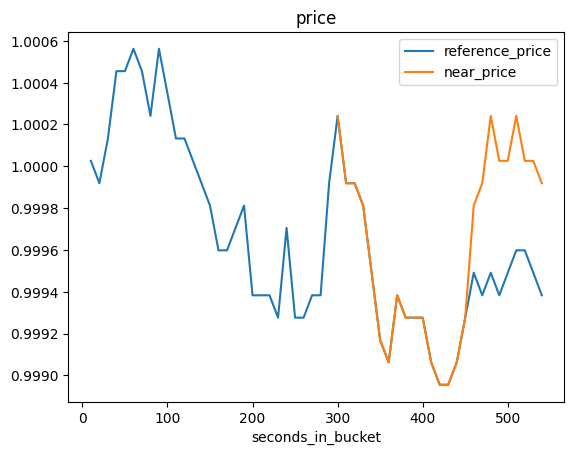

In [95]:


(
    df2
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','reference_price','near_price']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title='price')
)


<Axes: title={'center': 'Matched Size'}, xlabel='seconds_in_bucket'>

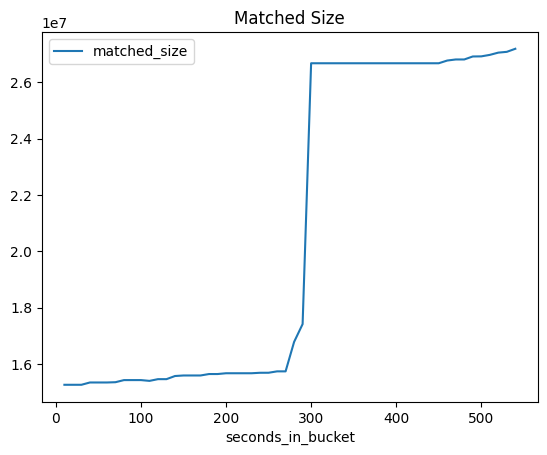

In [94]:
(
    df2
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','matched_size']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title='Matched Size')
)

<Axes: title={'center': 'Matched Size'}, xlabel='seconds_in_bucket'>

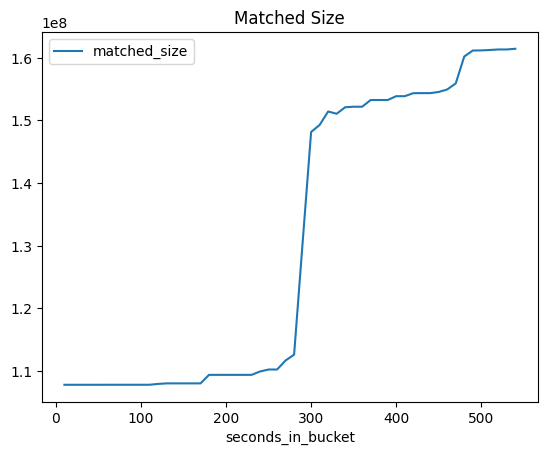

In [105]:
(
    df2
    .query('stock_id ==33 & date_id ==33')
    [['seconds_in_bucket','matched_size']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title='Matched Size')
)

Stock target performance:   0%|          | 0/3 [00:00<?, ?it/s]


TypeError: ignored

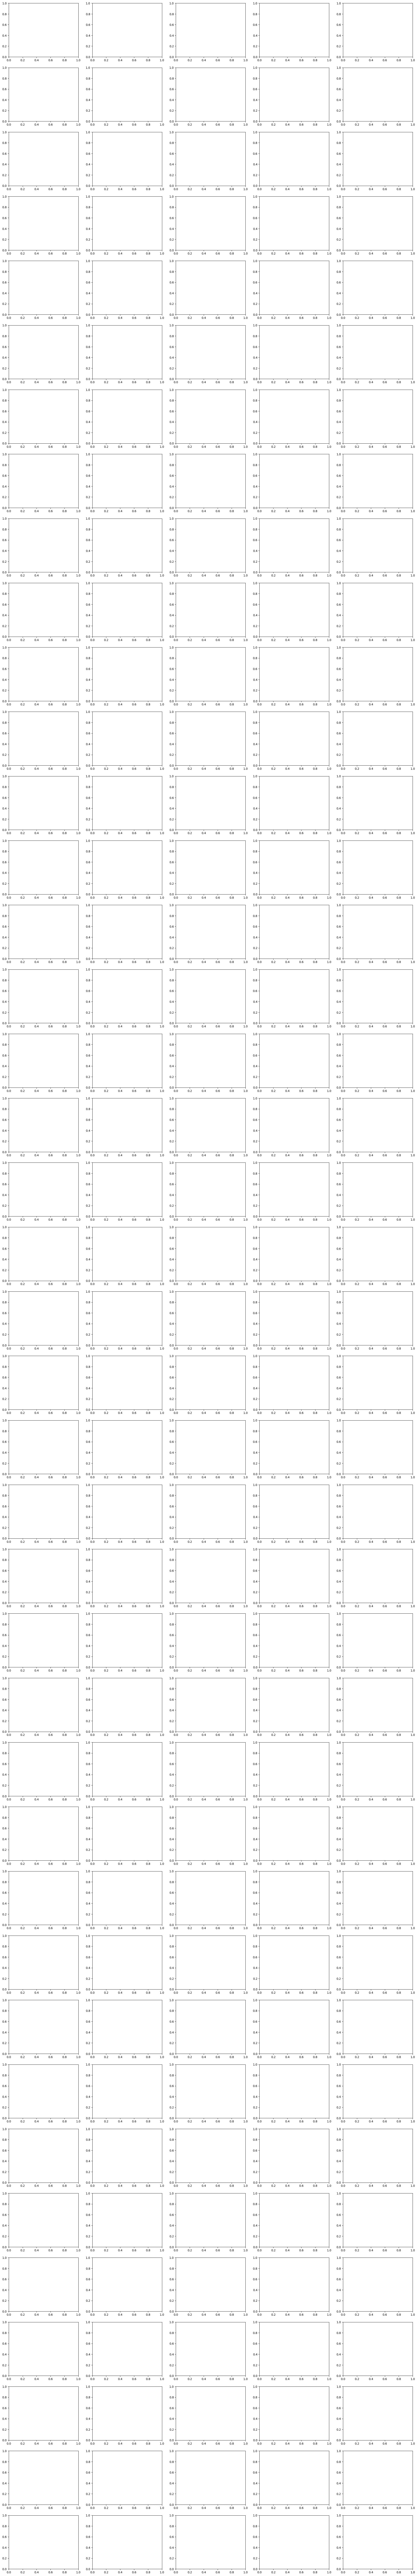

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming you have a DataFrame named df
# df = pd.read_csv('kaggle.csv')

fig, axes = plt.subplots(40, 5, figsize=(25, 160),
                         gridspec_kw={"hspace": 0.20, "wspace": 0.2})

colors = sns.color_palette('icefire', 100).as_hex()
nrange = 3

for i in tqdm(range(nrange), "Stock target performance"):
    X = df[['stock_id', 'date_id', df.target]]
    X = X[X['stock_id'] == i]
    X['XformTgt'] = (1 + X[df.target] / 10000).cumprod()

    ax = axes[i // 5, i % 5]
    c = colors[np.random.randint(len(colors))]

    sns.lineplot(data=X, y='XformTgt', x='date_id',
                 ax=ax, color=c, linewidth=1.1)
    ax.set(xlabel='', ylabel="")
    ax.set_title(f"Stock id = {i}")
    ax.set_xticks(range(0, 481, 20), labels=range(0, 481, 20), rotation=90)

    del X

plt.tight_layout()
plt.suptitle(f"Plotting all stocks for under/ over performance",
             y=0.89
             )
plt.show()

In [118]:
df = (
    df(['date_id', 'bid_size', 'ask_size'])
    .groupby('date_id')
    .agg(
        pl.col('bid_size').sum().alias("Tot_Bid_Vol") / pl.lit(1000000),
        pl.col('ask_size').sum().alias("Tot_Ask_Vol") / pl.lit(1000000)
    )
    .with_columns((pl.col("Tot_Bid_Vol") - pl.col("Tot_Ask_Vol")).alias("BidvsAsk_Vol"))
    .sort('date_id')
    .collect()
)


TypeError: ignored

In [128]:
import pandas as pd

df['bid_size_MA_200'] = df['bid_size'].rolling(window=200).mean()
df['ask_size_MA_200'] = df['ask_size'].rolling(window=200).mean()

def find_vol_by_date(col: str, sort_order: bool, df: pd.DataFrame, ntop: int = 10, c: str = "blue"):
    """
    This function finds the dates with high/low traded volumes and plots them in an HTML display.
    """
    df_abs_col = df.assign(Vol=df[col].abs()).sort_values(by='Vol', ascending=sort_order).head(ntop).drop('Vol', axis=1)

    styled_df = (
        df_abs_col.style
        .applymap(lambda x: f"""
            padding-right: 1.4em; z-index: 1;
            color: {c}; font-weight: bold; background: #f0f5f5;
            border: solid 1px black; border-radius: 1.5em;
        """)
        .format(precision=2)
        .set_caption(f"{col.upper().replace('_', ' ')}")
        .set_table_attributes("style='display:inline'")
    )

    return df_abs_col, styled_df

# Assuming df is your DataFrame

# Curating output lists for the display:-
high_vols = []
low_vols = []
colors = ['red', 'blue', 'brown']
ntop = 10

for i, col in enumerate(['bid_size_MA_200', 'ask_size_MA_200']):
    high_vol_df, high_vol_styled = find_vol_by_date(col=col, sort_order=True, df=df, c=colors[i], ntop=ntop)
    low_vol_df, low_vol_styled = find_vol_by_date(col=col, sort_order=False, df=df, c=colors[i], ntop=ntop)

    high_vols.append((high_vol_df, high_vol_styled))
    low_vols.append((low_vol_df, low_vol_styled))

# Displaying the results
print("\n\n Top {} trading days with high volumes\n".format(ntop))
for high_vol_df, high_vol_styled in high_vols:
    print(high_vol_styled)

print("\n\n Top {} trading days with low volumes\n".format(ntop))
for low_vol_df, low_vol_styled in low_vols:
    print(low_vol_styled)




 Top 10 trading days with high volumes



 Top 10 trading days with low volumes



In [129]:
# Displaying the results
print("\n\n Top {} trading days with high volumes\n".format(ntop))
for high_vol_df, high_vol_styled in high_vols:
    display(high_vol_styled)

print("\n\n Top {} trading days with low volumes\n".format(ntop))
for low_vol_df, low_vol_styled in low_vols:
    display(low_vol_styled)




 Top 10 trading days with high volumes



,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,bid_size_MA_200,ask_size_MA_200
2196246,7,204,10,14294171.84,1,1.00,30902399.84,nan,nan,1.00,12261.34,1.00,119102.76,1.00,-3.31,11221,204_10_7,14505.78,18451.39
2196258,19,204,10,0.00,0,1.00,2313696.70,nan,nan,1.00,4818.78,1.00,12700.00,1.00,23.84,11221,204_10_19,14512.06,20385.69
2196260,21,204,10,2540572.55,1,1.00,3095930.09,nan,nan,1.00,4911.43,1.00,6780.89,1.00,0.12,11221,204_10_21,14514.52,20395.41
2196259,20,204,10,3832195.80,-1,1.00,5617358.92,nan,nan,1.00,7525.54,1.00,7537.64,1.00,-16.06,11221,204_10_20,14517.31,20399.22
2196248,9,204,10,0.00,0,1.00,5559978.74,nan,nan,1.00,3519.50,1.00,2464.35,1.00,-2.17,11221,204_10_9,14517.90,20365.90
2196257,18,204,10,0.00,0,1.00,2845564.35,nan,nan,1.00,8685.00,1.00,6952.00,1.00,3.95,11221,204_10_18,14523.43,20324.10
2196262,23,204,10,1358076.97,1,1.00,11451810.91,nan,nan,1.00,100.38,1.00,4418.92,1.00,2.51,11221,204_10_23,14527.53,20230.44
2196263,24,204,10,1819153.38,-1,1.00,25959464.72,nan,nan,1.00,5095.92,1.00,5998.80,1.00,-1.81,11221,204_10_24,14532.95,20238.33
2196264,25,204,10,2721738.04,-1,1.00,6573321.68,nan,nan,1.00,10728.36,1.00,13468.16,1.00,12.77,11221,204_10_25,14536.65,20299.67
2196247,8,204,10,5401586.35,-1,1.00,22602993.45,nan,nan,1.00,18408.33,1.00,410292.00,1.00,33.41,11221,204_10_8,14541.27,20446.08


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,bid_size_MA_200,ask_size_MA_200
2349494,25,218,10,0.00,0,1.00,8104201.91,nan,nan,1.00,19516.86,1.00,7794.93,1.00,-9.97,11991,218_10_25,22424.15,15476.56
2349492,23,218,10,29223571.09,1,1.00,15749512.38,nan,nan,1.00,13516.90,1.00,12780.73,1.00,5.29,11991,218_10_23,22298.61,15488.29
2349485,16,218,10,0.00,0,1.00,7880162.56,nan,nan,1.00,300.08,1.00,4506.15,1.00,8.78,11991,218_10_16,21952.62,15493.67
2349482,13,218,10,6887202.85,-1,1.00,6419785.65,nan,nan,1.00,9071.00,1.00,3270.60,1.00,8.34,11991,218_10_13,21973.98,15494.13
2349484,15,218,10,6993384.29,-1,1.00,11250506.91,nan,nan,1.00,4941.50,1.00,4943.50,1.00,5.16,11991,218_10_15,21953.10,15495.93
2349493,24,218,10,0.00,0,1.00,27836090.84,nan,nan,1.00,13305.70,1.00,10271.80,1.00,-1.06,11991,218_10_24,22341.77,15518.57
2349481,12,218,10,24261869.97,-1,1.00,59273987.18,nan,nan,1.00,20746.00,1.00,28768.82,1.00,-3.45,11991,218_10_12,21980.53,15529.71
2349491,22,218,10,5864529.04,-1,1.00,17296984.12,nan,nan,1.00,113100.00,1.00,11312.00,1.00,4.40,11991,218_10_22,22475.80,15537.82
2349483,14,218,10,33643714.86,-1,1.00,52131757.44,nan,nan,1.00,13758.08,1.00,13773.99,1.00,-3.76,11991,218_10_14,21997.25,15540.20
2349478,9,218,10,0.00,0,1.00,4094304.42,nan,nan,1.00,19164.00,1.00,3195.50,1.00,4.75,11991,218_10_9,21945.10,15557.87




 Top 10 trading days with low volumes



,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,bid_size_MA_200,ask_size_MA_200
517487,113,48,490,0.00,0,1.00,18931107.64,1.00,1.00,1.00,122694.63,1.00,397.22,1.00,2.70,2689,48_490_113,365817.36,84947.96
517488,114,48,490,0.00,0,1.00,4641369.09,1.00,1.00,1.00,15239.77,1.00,172870.32,1.00,-1.33,2689,48_490_114,365337.78,85657.90
517486,112,48,490,41861443.64,-1,1.00,672897276.41,1.00,1.00,1.00,27014814.72,1.00,106678.00,1.00,-4.04,2689,48_490_112,365241.73,85010.05
517491,117,48,490,135055.78,-1,1.00,3674226.40,1.00,1.00,1.00,291352.88,1.00,256144.40,1.00,1.47,2689,48_490_117,364684.36,84919.56
517490,116,48,490,229325.56,-1,1.00,13947099.23,1.00,1.00,1.00,23878.80,1.00,18046.86,1.00,-1.10,2689,48_490_116,363420.71,84199.72
517489,115,48,490,9276367.53,-1,1.00,53399426.47,1.00,1.00,1.00,6558.56,1.00,41825.10,1.00,0.94,2689,48_490_115,363301.92,84658.67
517681,113,48,500,0.00,0,1.00,19558068.06,1.00,1.00,1.00,84185.20,1.00,4368.65,1.00,8.06,2690,48_500_113,339693.37,86263.58
517680,112,48,500,34720143.64,-1,1.00,680038576.41,1.00,1.00,1.00,24171315.58,1.00,366223.00,1.00,-4.03,2690,48_500_112,339294.28,86330.56
517682,114,48,500,0.00,0,1.00,4641369.09,1.00,1.00,1.00,18084.60,1.00,19593.99,1.00,7.88,2690,48_500_114,339089.40,85238.78
517685,117,48,500,135055.78,-1,1.00,3674226.40,1.00,1.00,1.00,292964.88,1.00,198140.92,1.00,0.14,2690,48_500_117,337941.83,83472.32


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,bid_size_MA_200,ask_size_MA_200
4554256,76,418,460,0.00,0,1.00,11805196.13,1.00,1.00,1.00,122106.60,1.00,97280.80,1.00,6.00,23036,418_460_76,106721.62,347318.10
4554257,77,418,460,5428407.19,1,1.00,36043953.01,1.01,1.00,1.00,95218.34,1.00,632.76,1.00,2.86,23036,418_460_77,106650.46,347153.56
4554260,80,418,460,347855.78,-1,0.99,3794387.73,0.99,0.99,0.99,5907.00,0.99,34703.12,0.99,2.44,23036,418_460_80,107288.78,347123.48
4554255,75,418,460,2849037.56,1,1.00,50529487.15,1.01,1.00,1.00,45701.28,1.00,40842.66,1.00,-6.21,23036,418_460_75,106610.61,347091.55
4554258,78,418,460,0.00,0,1.00,2033449.03,1.00,1.00,1.00,224649.75,1.00,263998.24,1.00,2.16,23036,418_460_78,106707.79,347087.63
4554243,63,418,460,0.00,0,1.00,8805913.59,1.00,1.00,1.00,88303.00,1.00,8514.00,1.00,0.31,23036,418_460_63,108064.66,347076.00
4554242,62,418,460,235821.97,-1,1.00,11317483.97,0.99,0.99,1.00,9154.88,1.00,54154.91,1.00,1.20,23036,418_460_62,108025.72,347073.43
4554244,64,418,460,0.00,0,1.00,9128392.94,1.00,1.00,1.00,28778.60,1.00,4669.80,1.00,-4.15,23036,418_460_64,108200.78,347060.44
4554259,79,418,460,3351402.46,-1,1.00,35271573.00,1.00,1.00,1.00,633793.95,1.00,147799.86,1.00,0.74,23036,418_460_79,107280.20,347023.83
4554261,81,418,460,270605.59,1,1.00,15319226.97,1.00,1.00,1.00,5855.10,1.00,169806.31,1.00,0.48,23036,418_460_81,107098.00,347005.36


In [ ]:
inspect